# Code

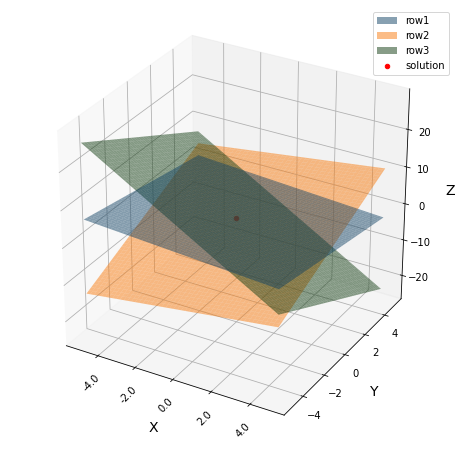

In [18]:
import numpy as np
import matplotlib as mpl
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

# Make x,y
x = np.linspace(-5, 5, 100)
y = np.linspace(-5, 5, 100)

x, y = np.meshgrid(x, y)

# Set a system
A = np.array([[1, 2, 3],
              [2, 5, 2],
              [6, -3, 1]])

b = np.array([6, 4, 2])

# Three planes
z0 = (b[0] - A[0,0] * x - A[0,1] * y) / A[0,2]
z1 = (b[1] - A[0,1] * x - A[1,1] * y) / A[2,1]
z2 = (b[2] - A[0,2] * x - A[1,2] * y) / A[2,2]

# Solve Ax=b with numpy
sol = np.linalg.solve(A, b)

# Plot 3d
fig = plt.figure(figsize=(8,8))
ax = fig.gca(projection='3d')
# fig, ax = plt.subplots(subplot_kw={'projection': '3d'})

surf0 = ax.plot_surface(x, y, z0, label='row1', alpha=.5)
surf1 = ax.plot_surface(x, y, z1, label='row2', alpha=.5)
surf2 = ax.plot_surface(x, y, z2, label='row3', alpha=.5)
ax.scatter(sol[0], sol[1], sol[2], s=20, color='r', label='solution')

# label
ax.set_xticklabels(ax.get_xticks(), rotation=45)

ax.set_xlabel('X', labelpad=13, fontdict={'size':14})
ax.set_ylabel('Y', labelpad=10, fontdict={'size':14})
ax.set_zlabel('Z', labelpad=10, fontdict={'size':14})

# Label each plane
surf0._edgecolors2d = surf0._edgecolors3d
surf1._edgecolors2d = surf1._edgecolors3d
surf2._edgecolors2d = surf2._edgecolors3d
surf0._facecolors2d = surf0._facecolors3d
surf1._facecolors2d = surf1._facecolors3d
surf2._facecolors2d = surf2._facecolors3d

ax.legend()
plt.show()

# Comment

### import packages
```
import numpy as np
import matplotlib as mpl
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
```
평면을 그리기 위해 기초적인 `xyzCoords`는 `numpy`를 통해 불러오고, `matplotlib`을 통해 그린다.

### Make xycoords
```
x = np.linspace(-5, 5, 100)
y = np.linspace(-5, 5, 100)

x, y = np.meshgrid(x, y)
```
`z`는 `xyCombs`(xy조합)를 수식에 대입해서 나오는 값에 의해 자동으로 연산된다.

### Set a system
```
A = np.array([[1, 2, 3],
              [2, 5, 2],
              [6, -3, 1]])

b = np.array([6, 4, 2])
```
`A`라는 매핑의 각 `row`는 하나의 평면을 이룬다.
`Ax=b`라는 시스템의 해가 곧 세 평면의 교차점을 의미한다.

### Three planes
```
z0 = (b[0] - A[0,0] * x - A[0,1] * y) / A[0,2]
z1 = (b[1] - A[0,1] * x - A[1,1] * y) / A[2,1]
z2 = (b[2] - A[0,2] * x - A[1,2] * y) / A[2,2]
```
각 평면의 `z`값을 연산한다.

### Solve Ax=b with numpy
```
sol = np.linalg.solve(A, b)
```
`numpy.linalg` 클라스의 `.solve(a, b)` 메서드에 의해 해가 계산된다. 패턴매칭 혹은 리스트 인덱싱으로 각각의 값을 구할 수 있다.

### Plot 3d
```
fig = plt.figure(figsize=(8,8))
ax = fig.gca(projection='3d')
# fig, ax = plt.subplots(subplot_kw={'projection': '3d'})

surf0 = ax.plot_surface(x, y, z0, label='row1', alpha=.5)
surf1 = ax.plot_surface(x, y, z1, label='row2', alpha=.5)
surf2 = ax.plot_surface(x, y, z2, label='row3', alpha=.5)
ax.scatter(sol[0], sol[1], sol[2], s=20, color='r', label='solution')

# label
ax.set_xticklabels(ax.get_xticks(), rotation=45)

ax.set_xlabel('X', labelpad=13, fontdict={'size':14})
ax.set_ylabel('Y', labelpad=10, fontdict={'size':14})
ax.set_zlabel('Z', labelpad=10, fontdict={'size':14})

# Label each plane
surf0._edgecolors2d = surf0._edgecolors3d
surf1._edgecolors2d = surf1._edgecolors3d
surf2._edgecolors2d = surf2._edgecolors3d
surf0._facecolors2d = surf0._facecolors3d
surf1._facecolors2d = surf1._facecolors3d
surf2._facecolors2d = surf2._facecolors3d

ax.legend()
plt.show()
```
`matplotlib3D`는 평면을 바로 `plt.legend()`에 의해 표시 못한다. 따라서 아래의 코드를 삽입하여 (일종의 fake legend`개념) 표시한다.
```
ax._edgecolors2d = ax._edgecolors3d
ax._facecolors2d = ax._facecolors3d
```

위 과제는 `서울시립대학교 인공지능혁신공유대학사업과정` 중 `환경공학부::환경빅데이터선형대수학`(학부대학원 공동개설 교과목)의 과제로 제출되었습니다.